In [2]:
!pip install catboost
!pip install xgboost

   ---------------------------------------- 0.0/149.9 MB ? eta -:--:--
    --------------------------------------- 2.6/149.9 MB 15.9 MB/s eta 0:00:10
   - -------------------------------------- 6.0/149.9 MB 15.2 MB/s eta 0:00:10
   -- ------------------------------------- 9.2/149.9 MB 15.1 MB/s eta 0:00:10
   --- ------------------------------------ 12.3/149.9 MB 15.0 MB/s eta 0:00:10
   ---- ----------------------------------- 15.5/149.9 MB 15.0 MB/s eta 0:00:09
   ---- ----------------------------------- 18.6/149.9 MB 14.9 MB/s eta 0:00:09
   ----- ---------------------------------- 21.5/149.9 MB 14.9 MB/s eta 0:00:09
   ------ --------------------------------- 24.6/149.9 MB 14.9 MB/s eta 0:00:09
   ------- -------------------------------- 27.8/149.9 MB 14.9 MB/s eta 0:00:09
   -------- ------------------------------- 30.9/149.9 MB 14.9 MB/s eta 0:00:08
   --------- ------------------------------ 34.1/149.9 MB 14.9 MB/s eta 0:00:08
   --------- ------------------------------ 37.2/149

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [7]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
X=df.drop('math score', axis=1)
y=df['math score']

In [12]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder", OneHotEncoder(), cat_features),
        ("StandardScaler", StandardScaler(), num_features)
    ]
)

In [13]:
X=preprocessor.fit_transform(X)

In [16]:
preprocessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [17]:
X.shape

(1000, 19)

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42) 
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [22]:
def evaluation_metrics(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    rmse=np.sqrt(mse)
    score=r2_score(true, predicted)
    return mse, mae, rmse, score

In [37]:
models={
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "Support Vector Regressor" : SVR(),
    "K Nearest Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "CatBoost Regressor" : CatBoostRegressor(),
    "XGB Regressor" : XGBRegressor()
}
model_list=[]
r2_list=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2=evaluation_metrics(y_train, y_train)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2=evaluation_metrics(y_test, y_test_pred)

    print("Model:", name)
    print()
    print("Model Performance for Training Dataset: ")
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-R2 Score: {:.4f}".format(model_train_r2))
    model_list.append(name)
    print()
    

    print("Model Performance for Testing Dataset: ")
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("=="*25)
    

Model: Linear Regression

Model Performance for Training Dataset: 
- Mean Absolute Error: 0.0000
- Mean Squared Error: 0.0000
- Root Mean Squared Error: 0.0000
-R2 Score: 1.0000

Model Performance for Testing Dataset: 
- Mean Absolute Error: 29.0952
- Mean Squared Error: 4.2148
- Root Mean Squared Error: 5.3940
-R2 Score: 0.8804
Model: Lasso

Model Performance for Training Dataset: 
- Mean Absolute Error: 0.0000
- Mean Squared Error: 0.0000
- Root Mean Squared Error: 0.0000
-R2 Score: 1.0000

Model Performance for Testing Dataset: 
- Mean Absolute Error: 42.5064
- Mean Squared Error: 5.1579
- Root Mean Squared Error: 6.5197
-R2 Score: 0.8253
Model: Ridge

Model Performance for Training Dataset: 
- Mean Absolute Error: 0.0000
- Mean Squared Error: 0.0000
- Root Mean Squared Error: 0.0000
-R2 Score: 1.0000

Model Performance for Testing Dataset: 
- Mean Absolute Error: 29.0563
- Mean Squared Error: 4.2111
- Root Mean Squared Error: 5.3904
-R2 Score: 0.8806
Model: Support Vector Regressor

In [38]:
model_list

['Linear Regression',
 'Lasso',
 'Ridge',
 'Support Vector Regressor',
 'K Nearest Neighbors Regressor',
 'Decision Tree Regressor',
 'Random Forest Regressor',
 'AdaBoost Regressor',
 'CatBoost Regressor',
 'XGB Regressor']

In [49]:
r2_df=pd.DataFrame({
    "Model" : model_list,
    "R2 Score" : r2_list
})
r2_df.sort_values(by='R2 Score', ascending=False)


,Model,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
8,CatBoost Regressor,0.851632
6,Random Forest Regressor,0.850199
7,AdaBoost Regressor,0.849003
9,XGB Regressor,0.827797
1,Lasso,0.825320
4,K Nearest Neighbors Regressor,0.783813
5,Decision Tree Regressor,0.745108
3,Support Vector Regressor,0.728600


### Linear Regression

In [56]:
reg=LinearRegression()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
score=r2_score(y_test, y_pred)*100
print("Accuracy: %.2f" %score)

Accuracy: 88.04


<Axes: xlabel='math score'>

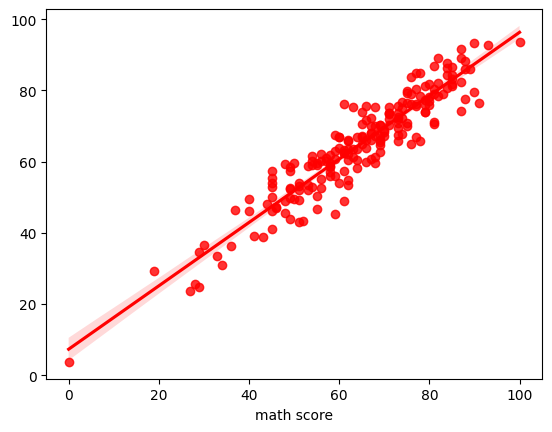

In [62]:
sns.regplot(data=df, x=y_test, y=y_pred, color='r')

In [58]:
pred_df=pd.DataFrame({
    "True Value" : y_test,
    "Predicted Value" : y_pred,
    "Difference" : y_test - y_pred
})
pred_df

,True Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
